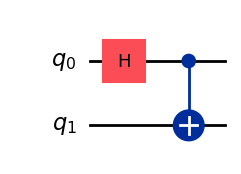

In [3]:
# This code creates a 2-qubit quantum circuit that generates a Bell state by applying a Hadamard gate to qubit 0 followed by a CNOT gate controlled by qubit 0 targeting qubit 1.

from qiskit import QuantumCircuit

qc = QuantumCircuit(2)  # Create a quantum circuit with 2 qubits

qc.h(0)                 # Apply a Hadamard gate on qubit 0
qc.cx(0, 1)             # Apply a CNOT (controlled-NOT) gate with qubit 0 as control and qubit 1 as target

qc.draw(output='mpl')   # Draw the circuit as a matplotlib plot

In [4]:
# This code creates a 1-qubit circuit putting the qubit into superposition with a Hadamard gate, measures it, simulates 1024 runs on a local quantum simulator, and prints the measurement outcome counts.
# Each time, the measurement counts are different (although there may be coincidences). Nevertheless, the number of 1s and 0s are always equal to the number of observations, in this case 1024.

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate to put the qubit in superposition
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Initialize the Aer simulator
simulator = AerSimulator()

# Run the circuit on the simulator with 1024 shots
job = simulator.run(qc, shots=1024)
result = job.result()

# Get the measurement counts (how many times each output was observed)
counts = result.get_counts()
print("Measurement counts:", counts)


Measurement counts: {'1': 501, '0': 523}


# QFT with 2 bits implementation

One of the results were:

`Counts: {'01': 259, '10': 232, '11': 282, '00': 251}`

This means that the wave is pretty much flat as the probability of encountering any state is practically the same.

Counts: {'01': 259, '10': 232, '11': 282, '00': 251}


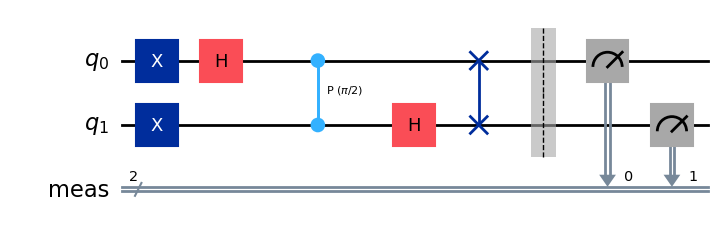

In [31]:
# This code creates a 2-qubit circuit, initializes the first and second qubit to |1⟩, applies the Quantum Fourier Transform, measures the result, simulates it 1024 times, and displays the output counts and circuit.

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Build the 2-qubit QFT circuit
qc = QuantumCircuit(2)

# Optional: Initialize qubits to non-trivial states
# Guide: nothing -> |00⟩, qc.x(0) -> |10⟩, qc.x(1) -> |01⟩, qc.x(0); qc.x(1) -> |11⟩
qc.x(0)
qc.x(1)

# QFT steps
qc.h(0)                     # Apply Hadamard to qubit 0 to create superposition
qc.cp(np.pi/2, 1, 0)        # Apply controlled phase (π/2) from qubit 1 to qubit 0
qc.h(1)                     # Apply Hadamard to qubit 1 to complete the QFT

# Optional: reverse qubit order with swap
# This is because the QFT natually outputs the result in reverse bit order
# The final state would be enconded as |q1 q0⟩ but we logically interpret it as |q0 q1⟩
qc.swap(0, 1)

# Add measurement
qc.measure_all()

# Simulate
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()

# Show result
print("Counts:", counts)
plot_histogram(counts)
plt.show()

# Show circuit
qc.draw('mpl')

# QFT with n bits implementation

One of the results were:

`QFT measurement counts: {'000': 145, '011': 140, '001': 111, '010': 121, '100': 128, '101': 113, '111': 137, '110': 129}`

This means that the wave is pretty much flat as the probability of encountering any state is practically the same.

QFT measurement counts: {'011': 125, '010': 144, '001': 124, '100': 144, '101': 132, '111': 115, '110': 121, '000': 119}


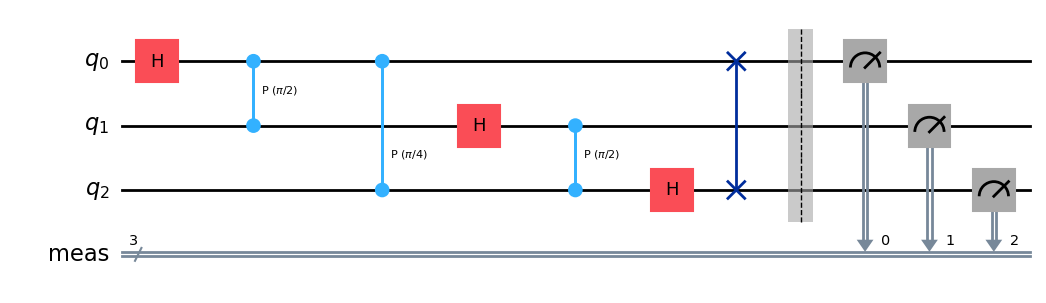

In [35]:
# This code creates a 3-qubit circuit, applies the Quantum Fourier Transform, measures the result, simulates it 1024 times, and displays the output counts and circuit.

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

def qft_circuit(n):
    qc = QuantumCircuit(n)
    for j in range(n):
        qc.h(j)
        for k in range(j+1, n):
            angle = np.pi / 2**(k - j)
            qc.cp(angle, k, j)
    # Swap qubits to reverse order (optional for correct output)
    for i in range(n//2):
        qc.swap(i, n - i - 1)
    return qc

n_qubits = 3
qc = qft_circuit(n_qubits)
qc.measure_all()

# Simulate
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()

# Print and plot results
print("QFT measurement counts:", counts)
plot_histogram(counts)
plt.show()

# Also draw the circuit
qc.draw('mpl')

# 5-qubit QFT Diagram

[This image](5qubit_qft_diagram.png) visually explains the function of the Quantum Fourier Transform (QFT), which is a fundamental tool in quantum computing for finding periodic patterns.

Each row shows an "Initial State" being transformed into a "Final State" by the QFT:

- **Initial States (Left):** These plots show a quantum system where the amplitudes of the different states (from `|00000>` to `|11111>`) have been prepared to form a wave-like pattern. Each row has a wave with a different frequency (i.e., the number of cycles it completes). A state's amplitude determines its probability of being observed when measured (specifically, the probability is the amplitude squared).

- **Final States (Right):** After the QFT is applied, the wave pattern is transformed into a single, sharp spike.

The key takeaway is that the location of the spike in the final state tells you the frequency of the wave in the initial state.

- **Top:** A low-frequency wave (1 cycle) results in a spike at state `|00001>` (binary for 1).
- **Middle:** A medium-frequency wave (2 cycles) results in a spike at `|00010>` (binary for 2).
- **Bottom:** A higher-frequency wave (5 cycles) results in a spike at `|00101>` (binary for 5).

In short, the image demonstrates that the QFT is a highly effective "frequency detector" for quantum states, a critical capability for powerful quantum algorithms.